## [`matplotlib`](https://matplotlib.org/) is the most widely used scientific plotting library in Python.

*   We commonly use a sub-library called [`matplotlib.pyplot`](https://matplotlib.org/api/pyplot_api.html).
*   The Jupyter Notebook will render plots inline if we ask it to using a "magic" command.

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

Simple plots are then (fairly) simple to create.

In [3]:
time = [0, 1, 2, 3]
position = [0, 100, 200, 300]

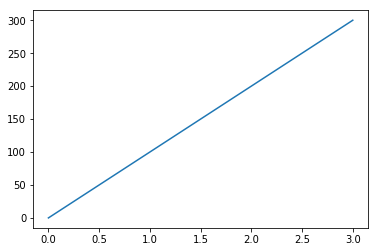

In [4]:
plt.plot(time, position)

Text(0,0.5,'Position (km)')

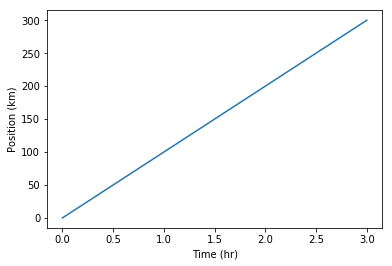

In [5]:
plt.plot(time, position)
plt.xlabel('Time (hr)')
plt.ylabel('Position (km)')

## Plot data directly from a [`Pandas dataframe`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html).

*   We can also plot [Pandas dataframes](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html).
*   This implicitly uses [`matplotlib.pyplot`](https://matplotlib.org/api/pyplot_api.html).
*   Before plotting, we convert the column headings from a `string` to `integer` data type, since they represent numerical values

In [6]:
import pandas as pd

In [8]:
data = pd.read_csv('data/gapminder_gdp_oceania.csv', index_col='country')

In [9]:
data.head()

,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
country,,,,,,,,,,,,
Australia,10039.59564,10949.64959,12217.22686,14526.12465,16788.62948,18334.19751,19477.00928,21888.88903,23424.76683,26997.93657,30687.75473,34435.36744
New Zealand,10556.57566,12247.39532,13175.67800,14463.91893,16046.03728,16233.71770,17632.41040,19007.19129,18363.32494,21050.41377,23189.80135,25185.00911


#### What if we want to plot years vs GDP per capita?

First, let's find a convenient way to access the years. We could type it out as a list, but as we get more and more data over the years, this will become inconvenient to do.

In [11]:
data.columns

Index(['gdpPercap_1952', 'gdpPercap_1957', 'gdpPercap_1962', 'gdpPercap_1967',
       'gdpPercap_1972', 'gdpPercap_1977', 'gdpPercap_1982', 'gdpPercap_1987',
       'gdpPercap_1992', 'gdpPercap_1997', 'gdpPercap_2002', 'gdpPercap_2007'],
      dtype='object')

In [27]:
help(str)

Help on class str in module builtins:

class str(object)
 |  str(object='') -> str
 |  str(bytes_or_buffer[, encoding[, errors]]) -> str
 |  
 |  Create a new string object from the given object. If encoding or
 |  errors is specified, then the object must expose a data buffer
 |  that will be decoded using the given encoding and error handler.
 |  Otherwise, returns the result of object.__str__() (if defined)
 |  or repr(object).
 |  encoding defaults to sys.getdefaultencoding().
 |  errors defaults to 'strict'.
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __format__(...)
 |      S.__format__(format_spec) -> str
 |      
 |      Return a formatted version of S as described by format_spec.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getatt

In [29]:
'gdpPercap_1952'.lstrip('gdpPercap_')

'1952'

In [30]:
data.columns.str.lstrip('gdpPercap_')

Index(['1952', '1957', '1962', '1967', '1972', '1977', '1982', '1987', '1992',
       '1997', '2002', '2007'],
      dtype='object')

In [31]:
years = data.columns.str.lstrip('gdpPercap_')

In [32]:
help(years.astype)

Help on method astype in module pandas.core.indexes.base:

astype(dtype, copy=True) method of pandas.core.indexes.base.Index instance
    Create an Index with values cast to dtypes. The class of a new Index
    is determined by dtype. When conversion is impossible, a ValueError
    exception is raised.
    
    Parameters
    ----------
    dtype : numpy dtype or pandas type
    copy : bool, default True
        By default, astype always returns a newly allocated object.
        If copy is set to False and internal requirements on dtype are
        satisfied, the original data is used to create a new Index
        or the original Index is returned.
    
        .. versionadded:: 0.19.0



In [33]:
years.astype(int)

Int64Index([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
            2007],
           dtype='int64')

In [34]:
data.columns = years.astype(int)

In [36]:
data

,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
country,,,,,,,,,,,,
Australia,10039.59564,10949.64959,12217.22686,14526.12465,16788.62948,18334.19751,19477.00928,21888.88903,23424.76683,26997.93657,30687.75473,34435.36744
New Zealand,10556.57566,12247.39532,13175.67800,14463.91893,16046.03728,16233.71770,17632.41040,19007.19129,18363.32494,21050.41377,23189.80135,25185.00911


## Select and transform data, then plot it.

*   By default, [`DataFrame.plot`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html#pandas.DataFrame.plot) plots with the rows as the X axis.
*   We can transpose the data in order to plot multiple series.

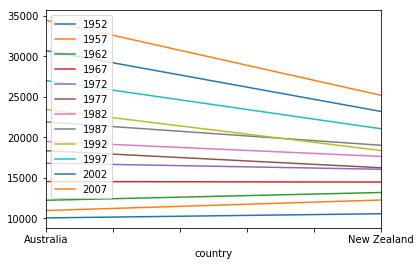

In [37]:
data.plot()

In [39]:
flipped_data = data.T

In [40]:
flipped_data

country,Australia,New Zealand
1952,10039.59564,10556.57566
1957,10949.64959,12247.39532
1962,12217.22686,13175.67800
1967,14526.12465,14463.91893
1972,16788.62948,16046.03728
1977,18334.19751,16233.71770
1982,19477.00928,17632.41040
1987,21888.88903,19007.19129
1992,23424.76683,18363.32494
1997,26997.93657,21050.41377


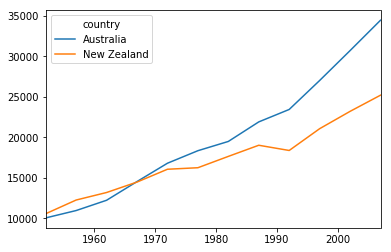

In [41]:
flipped_data.plot()

Text(0,0.5,'GDP Per Capita')

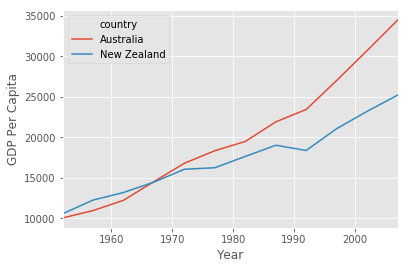

In [49]:
flipped_data.plot()
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')

## Many styles of plot are available.

#### Let's try plotting with a fancier style.

In [42]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 '_classic_test']

In [43]:
plt.style.use('ggplot')

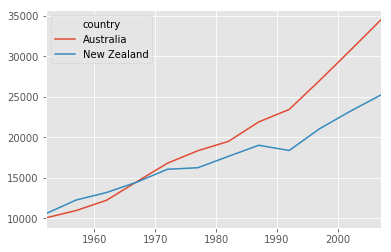

In [44]:
flipped_data.plot()

In [45]:
help(flipped_data.plot)

Help on FramePlotMethods in module pandas.plotting._core object:

class FramePlotMethods(BasePlotMethods)
 |  DataFrame plotting accessor and method
 |  
 |  Examples
 |  --------
 |  >>> df.plot.line()
 |  >>> df.plot.scatter('x', 'y')
 |  >>> df.plot.hexbin()
 |  
 |  These plotting methods can also be accessed by calling the accessor as a
 |  method with the ``kind`` argument:
 |  ``df.plot(kind='line')`` is equivalent to ``df.plot.line()``
 |  
 |  Method resolution order:
 |      FramePlotMethods
 |      BasePlotMethods
 |      pandas.core.base.PandasObject
 |      pandas.core.base.StringMixin
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __call__(self, x=None, y=None, kind='line', ax=None, subplots=False, sharex=None, sharey=False, layout=None, figsize=None, use_index=True, title=None, grid=None, legend=True, style=None, logx=False, logy=False, loglog=False, xticks=None, yticks=None, xlim=None, ylim=None, rot=None, fontsize=None, colormap=None, table=False, yerr

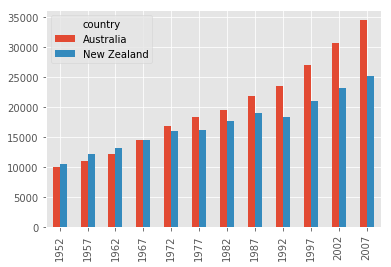

In [46]:
flipped_data.plot(kind='bar')

Text(0,0.5,'GDP Per Capita')

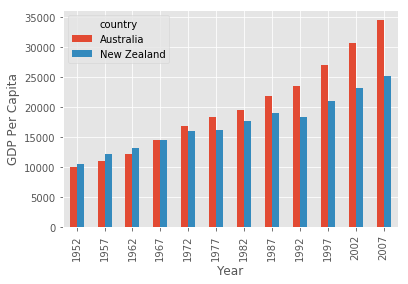

In [50]:
flipped_data.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')

Alternatively, we can use a different syntax to create the same plot.

Text(0,0.5,'GDP Per Capita')

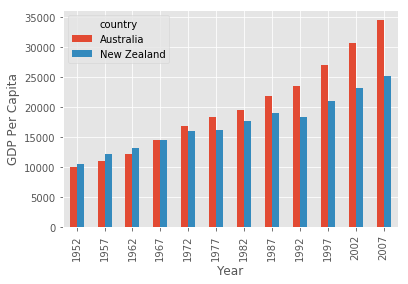

In [88]:
flipped_data.plot.bar()
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')

## Data can also be plotted by calling the `matplotlib` `plot` function directly.
*   The command is `plt.plot(x, y)`
*   The color / format of markers can also be specified as an optical argument: e.g. 'b-' is a blue line, 'g--' is a green dashed line.

In [54]:
years = data.columns

#### Let's try plotting only the Australia data.

In [57]:
data

,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
country,,,,,,,,,,,,
Australia,10039.59564,10949.64959,12217.22686,14526.12465,16788.62948,18334.19751,19477.00928,21888.88903,23424.76683,26997.93657,30687.75473,34435.36744
New Zealand,10556.57566,12247.39532,13175.67800,14463.91893,16046.03728,16233.71770,17632.41040,19007.19129,18363.32494,21050.41377,23189.80135,25185.00911


In [58]:
data.loc['Australia']

1952    10039.59564
1957    10949.64959
1962    12217.22686
1967    14526.12465
1972    16788.62948
1977    18334.19751
1982    19477.00928
1987    21888.88903
1992    23424.76683
1997    26997.93657
2002    30687.75473
2007    34435.36744
Name: Australia, dtype: float64

In [55]:
gdp_australia = data.loc['Australia']

In [68]:
years

Int64Index([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
            2007],
           dtype='int64')

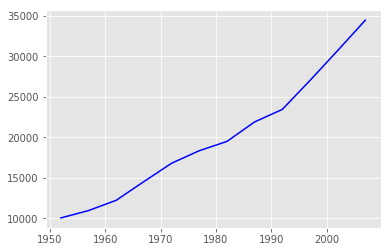

In [59]:
plt.plot(years, gdp_australia, 'b-')

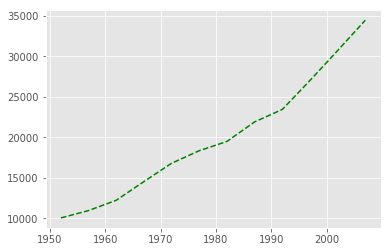

In [60]:
plt.plot(years, gdp_australia, 'g--')

Text(0,0.5,'GDP Per Capita')

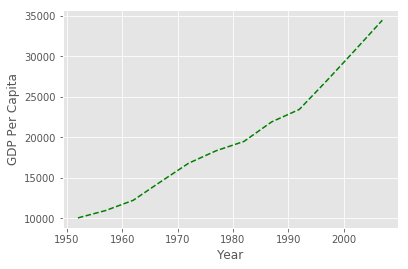

In [61]:
plt.plot(years, gdp_australia, 'g--')
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')

## We can also plot many sets of data together.

#### Let's try to use the `matplotlib.pyplot` module directly to plot both Australia and New Zealand's data.

First, let's select the data from each country.

In [62]:
data

,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
country,,,,,,,,,,,,
Australia,10039.59564,10949.64959,12217.22686,14526.12465,16788.62948,18334.19751,19477.00928,21888.88903,23424.76683,26997.93657,30687.75473,34435.36744
New Zealand,10556.57566,12247.39532,13175.67800,14463.91893,16046.03728,16233.71770,17632.41040,19007.19129,18363.32494,21050.41377,23189.80135,25185.00911


In [63]:
data.loc['Australia']

1952    10039.59564
1957    10949.64959
1962    12217.22686
1967    14526.12465
1972    16788.62948
1977    18334.19751
1982    19477.00928
1987    21888.88903
1992    23424.76683
1997    26997.93657
2002    30687.75473
2007    34435.36744
Name: Australia, dtype: float64

In [64]:
australia = data.loc['Australia']

In [65]:
data.loc['New Zealand']

1952    10556.57566
1957    12247.39532
1962    13175.67800
1967    14463.91893
1972    16046.03728
1977    16233.71770
1982    17632.41040
1987    19007.19129
1992    18363.32494
1997    21050.41377
2002    23189.80135
2007    25185.00911
Name: New Zealand, dtype: float64

In [66]:
new_zealand = data.loc['New Zealand']

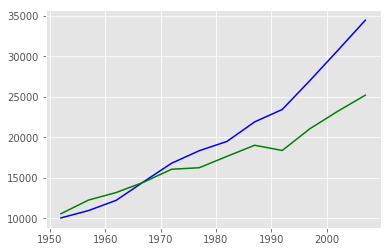

In [70]:
plt.plot(years, australia, 'b-', label='Australia')
plt.plot(years, new_zealand, 'g-', label='New Zealand')

Text(0,0.5,'GDP per capita')

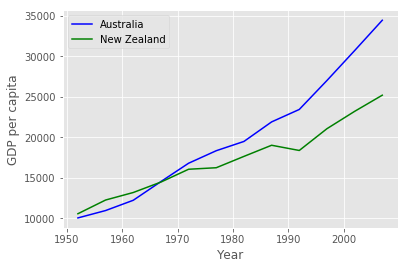

In [73]:
plt.plot(years, australia, 'b-', label='Australia')
plt.plot(years, new_zealand, 'g-', label='New Zealand')
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('GDP per capita')

#### Now let's try plotting the same data as a scatter plot to see the correlation between Australia and New Zealand.

To do this, we can use:
* `plt.scatter`
* `DataFrame.plot`
* `DataFrame.plot.scatter`

First, we'll try with `plt.scatter`.

In [77]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, hold=None, data=None, **kwargs)
    Make a scatter plot of `x` vs `y`.
    
    Marker size is scaled by `s` and marker color is mapped to `c`.
    
    Parameters
    ----------
    x, y : array_like, shape (n, )
        Input data
    
    s : scalar or array_like, shape (n, ), optional
        size in points^2.  Default is `rcParams['lines.markersize'] ** 2`.
    
    c : color, sequence, or sequence of color, optional, default: 'b'
        `c` can be a single color format string, or a sequence of color
        specifications of length `N`, or a sequence of `N` numbers to be
        mapped to colors using the `cmap` and `norm` specified via kwargs
        (see below). Note that `c` should not be a single numeric RGB or
        RGBA sequence because that is indistinguishable from an arra

In [78]:
australia

1952    10039.59564
1957    10949.64959
1962    12217.22686
1967    14526.12465
1972    16788.62948
1977    18334.19751
1982    19477.00928
1987    21888.88903
1992    23424.76683
1997    26997.93657
2002    30687.75473
2007    34435.36744
Name: Australia, dtype: float64

In [79]:
new_zealand

1952    10556.57566
1957    12247.39532
1962    13175.67800
1967    14463.91893
1972    16046.03728
1977    16233.71770
1982    17632.41040
1987    19007.19129
1992    18363.32494
1997    21050.41377
2002    23189.80135
2007    25185.00911
Name: New Zealand, dtype: float64

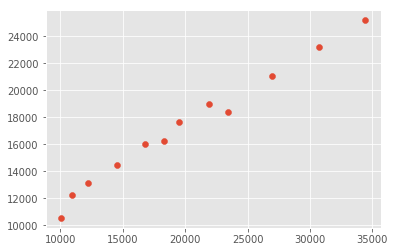

In [80]:
plt.scatter(australia, new_zealand)

Text(0,0.5,'New Zealand GDP Per Capita')

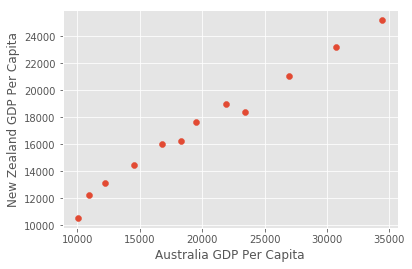

In [81]:
plt.scatter(australia, new_zealand)
plt.xlabel('Australia GDP Per Capita')
plt.ylabel('New Zealand GDP Per Capita')

Now, let's try using Pandas (`DataFrame.plot` or `DataFrame.plot.scatter`)

In [74]:
data

,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
country,,,,,,,,,,,,
Australia,10039.59564,10949.64959,12217.22686,14526.12465,16788.62948,18334.19751,19477.00928,21888.88903,23424.76683,26997.93657,30687.75473,34435.36744
New Zealand,10556.57566,12247.39532,13175.67800,14463.91893,16046.03728,16233.71770,17632.41040,19007.19129,18363.32494,21050.41377,23189.80135,25185.00911


In [75]:
flipped_data

country,Australia,New Zealand
1952,10039.59564,10556.57566
1957,10949.64959,12247.39532
1962,12217.22686,13175.67800
1967,14526.12465,14463.91893
1972,16788.62948,16046.03728
1977,18334.19751,16233.71770
1982,19477.00928,17632.41040
1987,21888.88903,19007.19129
1992,23424.76683,18363.32494
1997,26997.93657,21050.41377


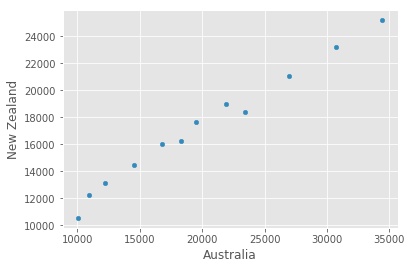

In [83]:
flipped_data.plot(kind='scatter', x='Australia', y='New Zealand')

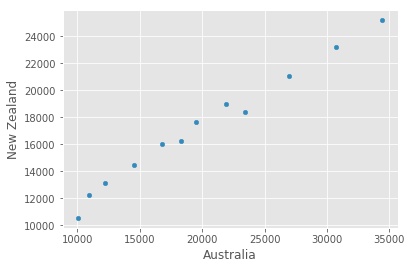

In [84]:
flipped_data.plot.scatter(x='Australia', y='New Zealand')

## Saving your plot to a file

If you are satisfied with the plot you see you may want to save it to a file, perhaps to include it in a publication. There is a function in the matplotlib.pyplot module that accomplishes this: [savefig](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.savefig.html).

Calling this function will save the current figure to the file `my_figure.png`. The file format will automatically be deduced from the file name extension (other formats are pdf, ps, eps and svg).

In a Jupyter notebook, we must call this function in the same cell in which we make the figure.

#### Let's say we want to save the previous scatter plot.

In [89]:
help(plt.gcf)

Help on function gcf in module matplotlib.pyplot:

gcf()
    Get a reference to the current figure.



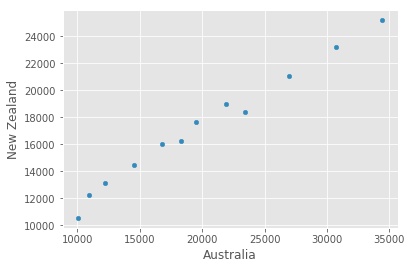

In [92]:
flipped_data.plot.scatter(x='Australia', y='New Zealand')
plt.gcf()
plt.savefig('img.pdf')